# Task 1 - Prediction using Supervised ML

## Problem Statement:
- Predict the percentage of a student based on the number of study hours.
- What will be predicted score if a student studies for 9.25 hrs/day?

## Dataset:
- http://bit.ly/w-data

**Author:- MANISH KUMAR**

# Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing necessary modules from sklearn for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and Inspect Data

In [2]:
# Loading the dataset and displaying the first 6 rows
df=pd.read_csv("http://bit.ly/w-data")
df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [3]:
# Displaying the last 6 rows of the dataset.
df.tail(6)

,Hours,Scores
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# Displaying the shape (number of rows and columns) of the dataset.
df.shape

(25, 2)

In [5]:
# Providing a concise summary of the dataset including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Generating descriptive statistics for the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Cleaning

In [7]:
# Checking for missing values in the dataset.
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

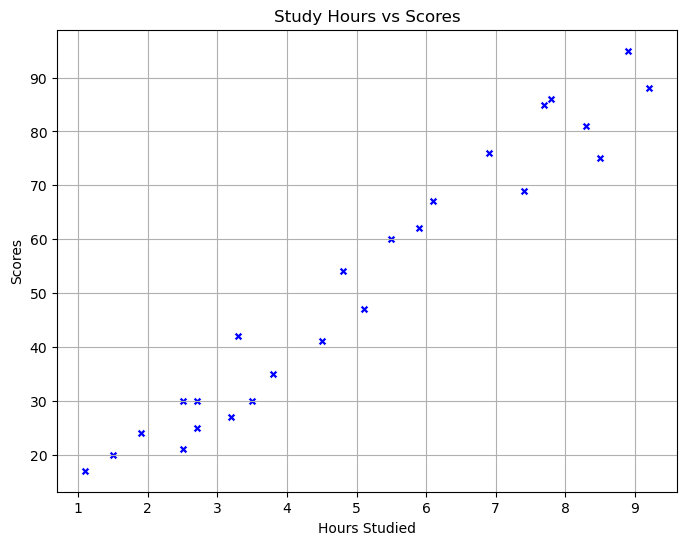

In [8]:
# Visualizing the relationship between study hours and scores using a scatter plot.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=df, marker="X", color="b")
plt.title('Study Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

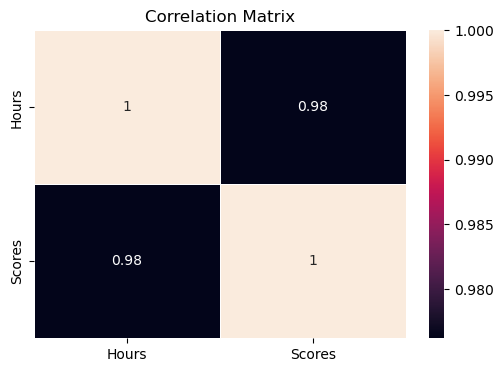

In [9]:
# Displaying the correlation matrix using a heatmap.
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Preparation

In [10]:
# Splitting the data into input features (X) and target variable (y).
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print("Values of x :", x)
print("Values of y :", y)

Values of x : [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Values of y : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Train-Test Split

In [11]:
# Splitting the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape

(20, 1)

# Model Training

In [12]:
# Creating an instance of the LinearRegression model and training it on the training data.
algo =  LinearRegression()
algo.fit(X_train, Y_train)

LinearRegression()

# Model Coefficients

In [13]:
# Displaying the coefficient of the trained linear model.
algo.coef_

array([9.91065648])

In [14]:
# Displaying the intercept of the trained linear model.
algo.intercept_

2.018160041434683

# Visualize Training Results

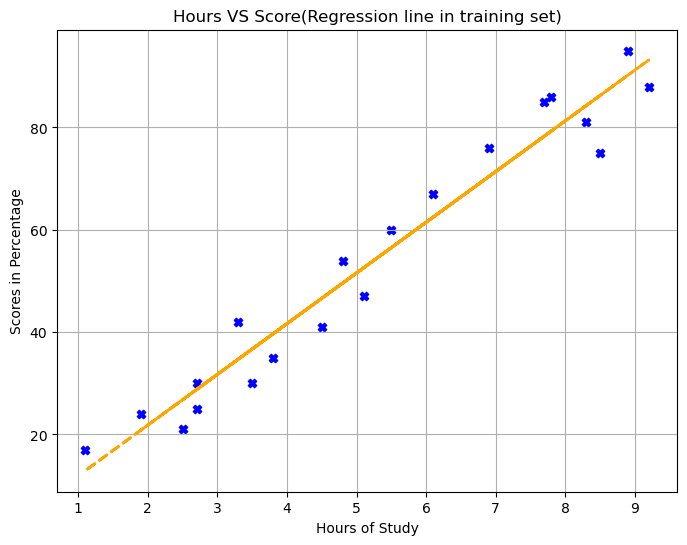

In [14]:
# Calculate Line with training data.
line = algo.coef_*X_train + algo.intercept_

# Best-fit line for training data.
plt.figure(figsize=(8, 6))
plt.scatter(X_train,Y_train, marker="X", color="blue")
plt.plot(X_train,line, color="orange", linestyle="--", linewidth=2)
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score(Regression line in training set)")
plt.grid(True)
plt.show()

# Model Prediction

In [15]:
# Making predictions on the test data.
Y_pred = algo.predict(X_test)
df_results = pd.DataFrame({'Actual values': Y_test,'Predicted values': Y_pred})
print(df_results)

   Actual values  Predicted values
0             20         16.884145
1             27         33.732261
2             69         75.357018
3             30         26.794801
4             62         60.491033


# Visualize Test Results

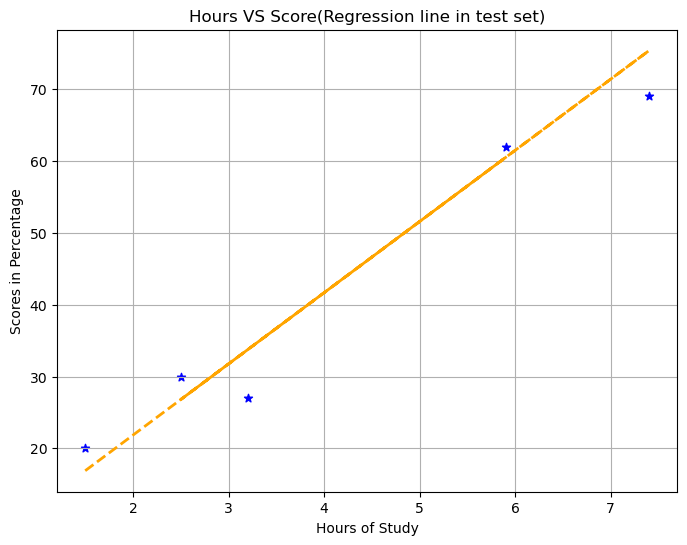

In [16]:
# Best-fit line for test data.
plt.figure(figsize=(8, 6))
plt.scatter(X_test,Y_test, marker="*", color="blue")
plt.plot(X_test,Y_pred, color="orange", linestyle="--", linewidth=2)
plt.xlabel("Hours of Study")
plt.ylabel("Scores in Percentage")
plt.title("Hours VS Score(Regression line in test set)")
plt.grid(True)
plt.show()

# Prediction for Specific Value

In [17]:
# Predicting the score for 9.25 hours of study
hours = [[9.25]]
predicted_score = algo.predict(hours)
print(f"Predicted Score for 9.25 hours/day: {predicted_score[0]}")

Predicted Score for 9.25 hours/day: 93.69173248737538


# Model Evaluation

In [18]:
# Calculating and printing the R² scores for both the test and training sets.
score_test = algo.score(X_test, Y_test)
score_training = algo.score(X_train, Y_train)
score_test, score_training
print("R² Score for the test set:", score_test)
print("R² Score for the training set:", score_training)

R² Score for the test set: 0.9454906892105356
R² Score for the training set: 0.9515510725211552


In [19]:
# Calculating and printing the Mean Absolute Error and Mean Squared Error for the test set predictions.
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
